# Linear regression from scratch

Well, not really from scratch. But defining functions that:
- sum of mean squared errors between fitted line and target variable
- batch gradient descent (using the whole dataset)
- using learning rate and gradient descent to adjust parameters w and b to find the line of least residuals

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

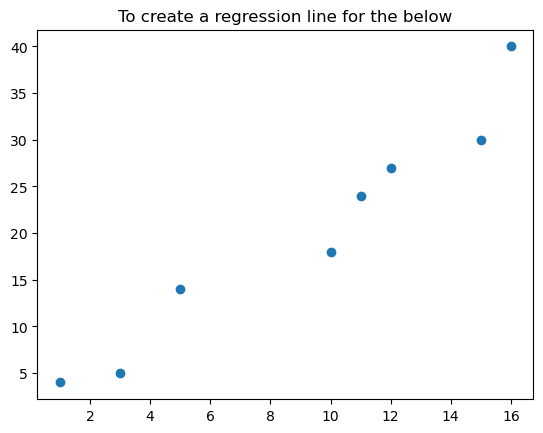

In [38]:
# create initial dataset

x = pd.Series([1, 3, 5, 10, 11, 12, 15, 16])
y = pd.Series([4, 5, 14, 18, 24, 27, 30, 40 ])

plt.scatter(x, y)
plt.title('To create a regression line for the below')
plt.show()


# Defining functions for simple linear regression model

In [42]:
# Linear model for making predictions of y based on x
# y = wx + b 
def model_fit(w, b, x):
    y = [ w*i + b for i in x ]
    return pd.Series(y)

# calculate the mean squared errors 
# (prediction - true values)^2 / (2 * number of values)
def mean_error(list_true, list_pred):
    return ((list_pred - list_true)**2).sum() / (2*len(list_true))
    

# calculate the gradient of the cost function  
# by taking the derivatives for w and b 
# The gradient of the cost function determines the direction and size 
# of the corrective step for new w and b values
def gradient_descent(w, b, learn_rate, list_true, list_pred):
    step_w = ((list_pred - list_true) * list_true).sum() / len(list_true)
    step_b = (list_pred - list_true).sum() / len(list_true)
    
    # calculate the new value of w and b, by deducting the learning step   
    tmp_b, tmp_w = None, None
    tmp_w = w - learn_rate * step_w
    tmp_b = b - learn_rate * step_b

    w = tmp_w if tmp_w else w    
    b = tmp_b if tmp_b else b
    return w, b



def start_model(w, b, learn_rate, x, y):

    count = 0
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)
    ax1.set_title('Mean squared error vs Iterations')
    ax2.set_title("Mean squared error vs w")
    ax3.set_title("Mean squared error vs b")
    plt.tight_layout()
    
    # Conditions for stopping
    # if gradient of cost function = 0 or < 0.001
    # if number of iterations go above a certain value
    # if mean square errors < 0.1 or some number
    # max of 500 iterations for gradient descent
    while count != 500:

        predictions = model_fit(w, b, x)
        error = mean_error(y, predictions)

        # plot graph of mean squared errors against number of iterations
        ax1.scatter(count, error )

        # plot graph of error against values of w and b
        ax2.scatter(w, error )
        ax3.scatter(b, error)
        
        if error < 3:
            break
        else:
            w, b = gradient_descent(w, b, learn_rate, y, predictions)
            count += 1
    
    print("w:", w, "\nb:", b, "\niterations:",count)
    return w, b 


def model_predict(w, b, x, y):
    new_y = w*x + b
#   return predictions of model
    return new_y    

def draw_model(w,b,x,y):
    new_y = model_predict(w,b,x,y)
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.plot(x, new_y)
    ax.set_title('Line of best fit')



w: 2.179107265801093 
b: 0.759356946824835 
iterations: 500
Model predictions Mean error: 4.010172642717794


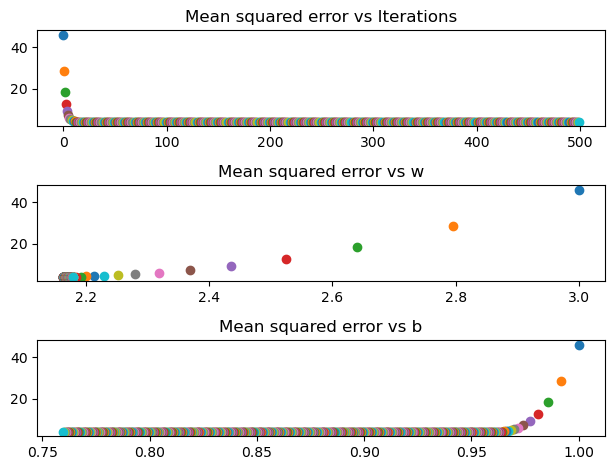

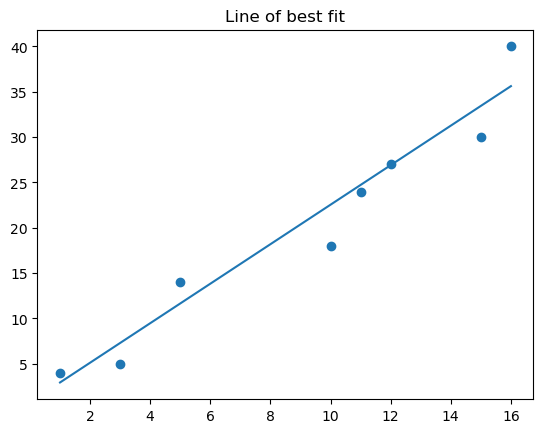

In [43]:
x = pd.Series([1, 3, 5, 10, 11, 12, 15, 16])
y = pd.Series([4, 5, 14, 18, 24, 27, 30, 40 ])

# start_model(w, b, learn_rate, x, y)
# initial values for w, b, learn_rate
w, b = start_model(3, 1, 0.001, x, y)

# Draw best fit model line through the dataset
predictions = model_predict(w, b, x, y)
draw_model(w,b,x,y)
print("Model predictions Mean error:", mean_error(y, predictions))


w: 2.1635264213305505 
b: 0.9464743071924436 
iterations: 500
Model predictions Mean error: 4.033138682683625


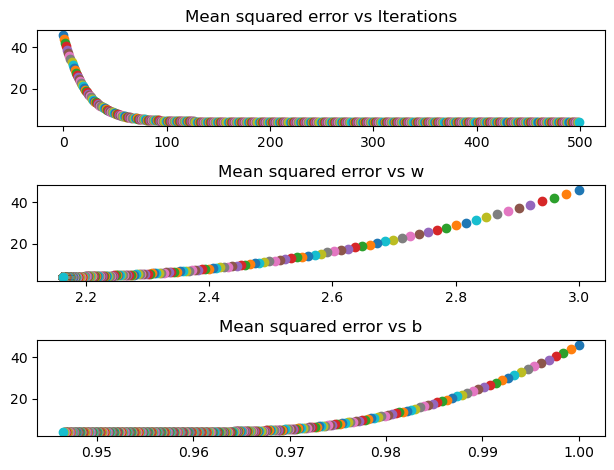

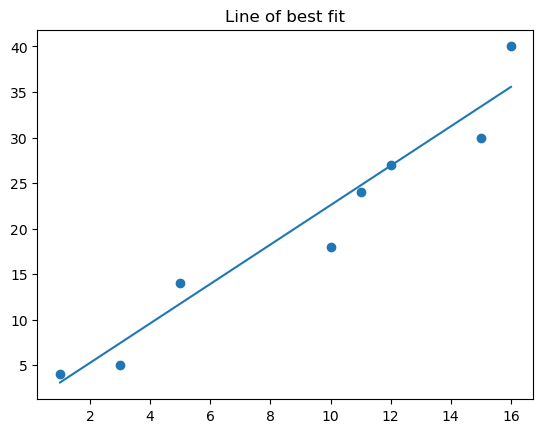

In [44]:
# start_model(w, b, learn_rate, x, y)
# initial values for w, b, learn_rate
w, b = start_model(3, 1, 0.0001, x, y)


# Draw best fit model line through the dataset
predictions = model_predict(w, b, x, y)
draw_model(w,b,x,y)
print("Model predictions Mean error:", mean_error(y, predictions))

# Depending on our initial values that we set for w and b, the linear model will return best line w and b values.

In order to avoid getting stuck in a local minimum for the gradient descent (i.e. we want to find the global minimum), we can randomize initial values of w and b, and see which one results in the best line with minimum residuals.

Using: 0 -5
w: 2.612641608106958 
b: -4.445945271291252 
iterations: 500
Model predictions mean error: 6.794950913025483
Using: -3 3
w: 2.0152501919438746 
b: 2.7267341688148656 
iterations: 500
Model predictions mean error: 4.6786632598903655
Using: -2 -1
w: 2.312564069566707 
b: -0.8430143739083343 
iterations: 500
Model predictions mean error: 4.1633226109845065
Using: 3 1
w: 2.179107265801093 
b: 0.759356946824835 
iterations: 500
Model predictions mean error: 4.010172642717794
Using: 1 -1
w: 2.320855052318963 
b: -0.9425614378874793 
iterations: 500
Model predictions mean error: 4.1934995285674335
Using: 0 -2
w: 2.391728945577898 
b: -1.7935206302436375 
iterations: 500
Model predictions mean error: 4.550107165287205
Using: -1 2
w: 2.0944150679550653 
b: 1.7762279124795661 
iterations: 500
Model predictions mean error: 4.23781388949111
Using: -5 -2
w: 2.377910640990805 
b: -1.6276088569450593 
iterations: 500
Model predictions mean error: 4.466717660446023
Using: -5 3
w: 2.0097228

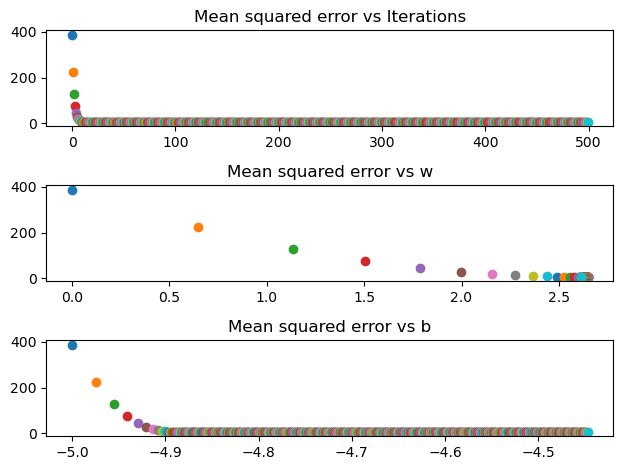

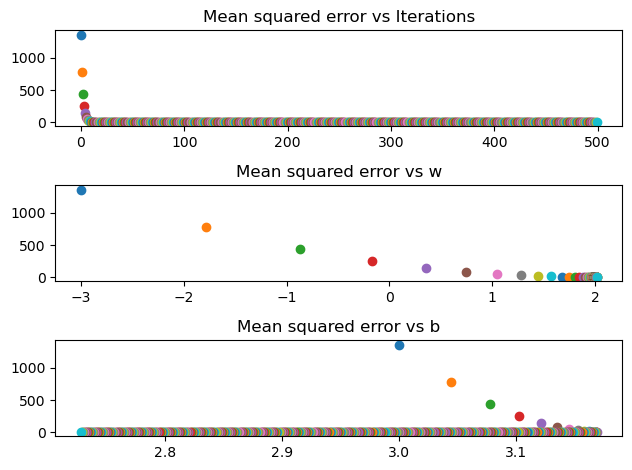

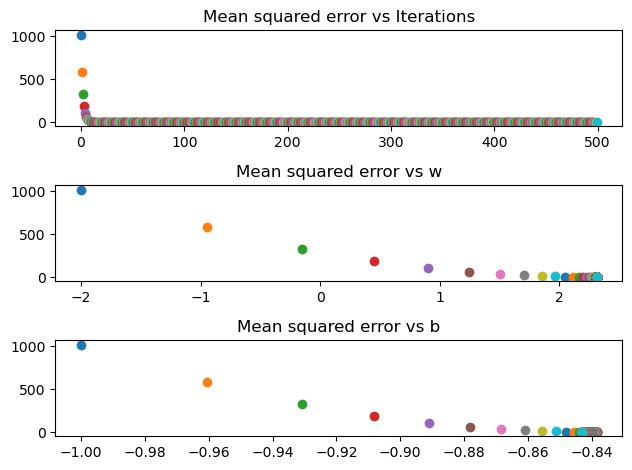

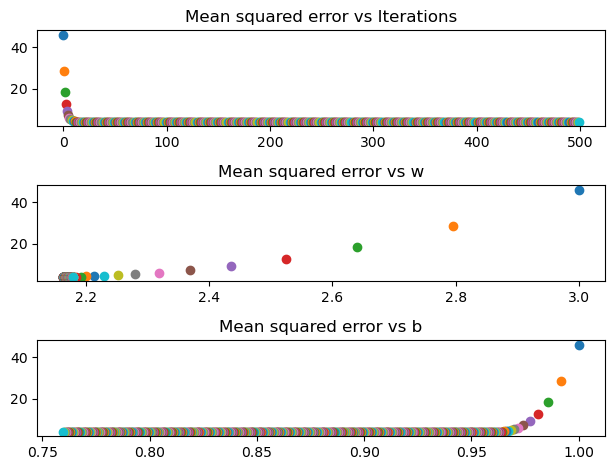

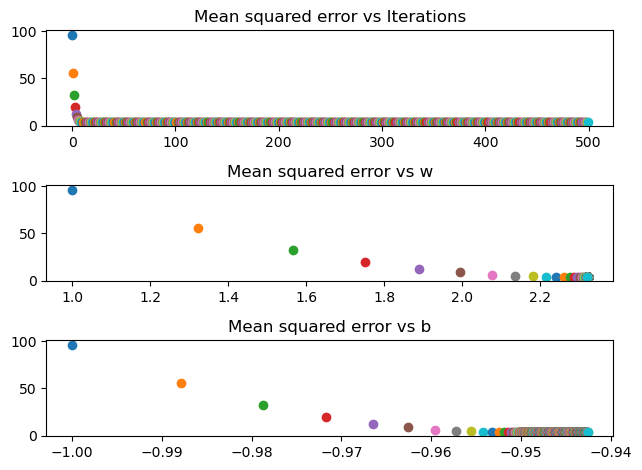

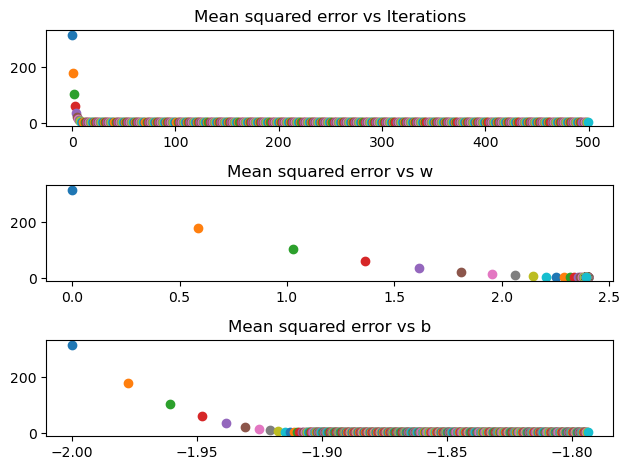

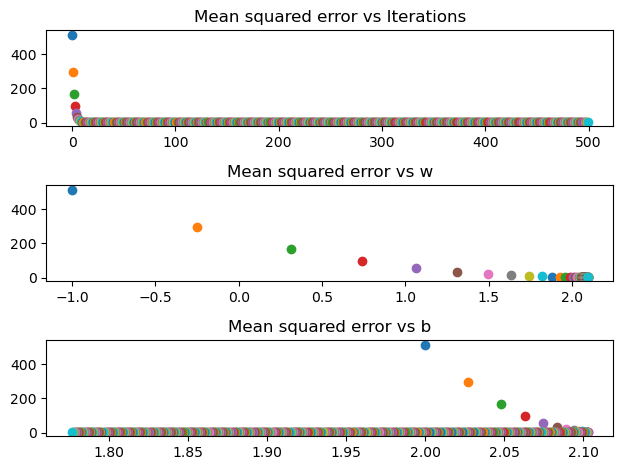

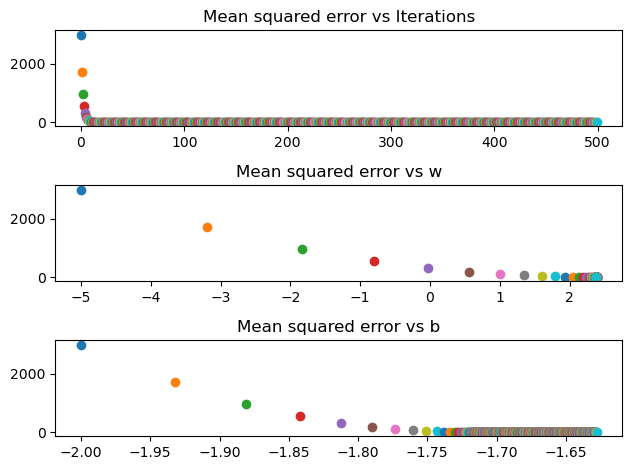

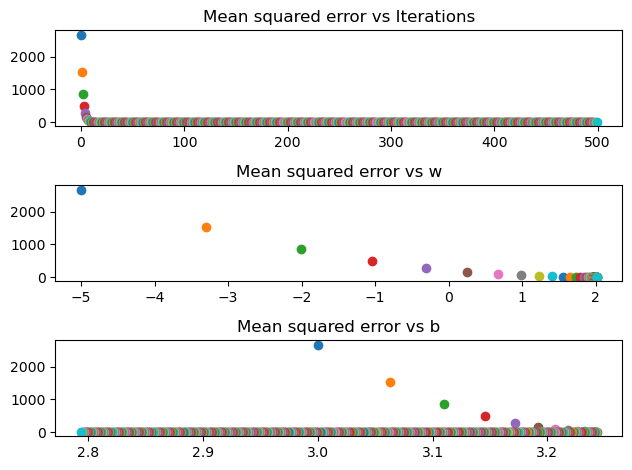

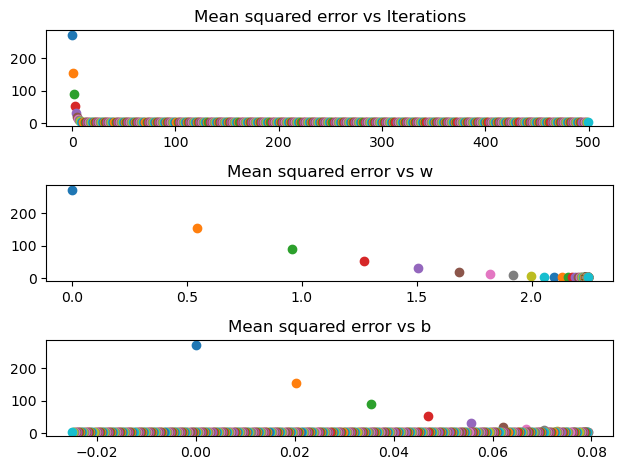

In [49]:
# get randomized values for initial w and b
w = np.random.randint(-5,5,10)
b = np.random.randint(-5,5,10)

best_error = 10
best_wb = None

for i in range(len(w)):
    print("Using:", w[i], b[i])
    w_res, b_res = start_model(w[i],b[i],0.001, x,y)
    predictions = model_predict(w_res, b_res, x, y)    
    error = mean_error(y, predictions)
    
    if error < best_error:
        best_error = error
        best_wb = (w_res, b_res)

    print("Model predictions mean error:", error)

print("-----"*10)    
print("Best wb:", best_wb)
print("Best error", best_error)



2.244453837225191 -0.025237536211891946


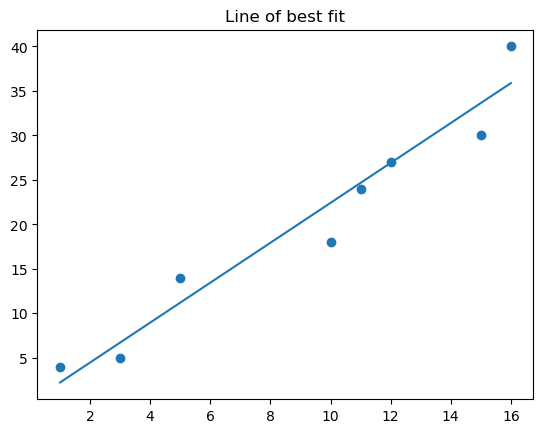

In [51]:
print(best_wb[0], best_wb[1])
draw_model(best_wb[0], best_wb[1], x, y)

